In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *
from copy import copy, deepcopy
import matplotlib as mpl
import seaborn as sns
from parameters import *

from models.game_theory_model.benefit_function import *
from models.game_theory_model.damage_function import *

from models.game import *
from plot_function import *

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context('paper')

# sns.set_style('darkgrid',  {"axes.grid" : "True", "grid.color": ".6", "grid.linestyle": ":"})
# sns.set_context("talk")
# plt.rcParams.update({
#     # "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": ["Helvetica"],
#     "figure.titlesize": 16})
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'
# sns.axes_style( { 'xtick.color': 'black',
#  'ytick.color': 'black',
#  'xtick.bottom': True,
#  'xtick.top': True,
#  'ytick.left': True,
#  'ytick.right': True})
# # mpl.rc('text', usetex=True)
# mpl.rc('ytick'  , labelsize=15)
# mpl.rc('xtick'  , labelsize=13)

# mpl.rc('legend' , fontsize= 18)
# mpl.rc('axes'   , labelsize=15,  titlesize=16) 
# plt.rcParams['font.size'] = '16'
# puissance de la fonction damage 

alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,100])

# Création des joueurs 

list_players = create_players(list_benefit_functions=BENEFITS_CONVEX, damage_function=damage_polynome(damage_coef))
# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=(9,6), name='quadratic_convex')

ImportError: attempted relative import with no known parent package

In [ ]:
game.scm_game.carbon_model.name

In [ ]:
x = Carbon_JOOS()

In [ ]:
x.initial_state

In [ ]:
import numpy as np

ACTION_SETS = np.array([[0.0, 11.47],        # China  
                        [0.0, 5.01],         # USA
                        [0.0, 3.14],         # EU
                        [0.0, 2.71],         # India
                        [0.0, 1.76],         # Russia
                        [0.0, 7.51]])        # other Asia  

In [ ]:
np.sum(ACTION_SETS)

In [ ]:
import numpy as np

def bmatrix(a):
    """Returns a LaTeX bmatrix

    :a: numpy array
    :returns: LaTeX bmatrix as a string
    """
    if len(a.shape) > 2:
        raise ValueError('bmatrix can at most display two dimensions')
    lines = str(a).replace('[', '').replace(']', '').splitlines()
    rv = [r':math:`\begin{bmatrix}']
    rv += ['  ' + ' & '.join(l.split()) + r'\\' for l in lines]
    rv +=  [r'\end{bmatrix}`']
    return ' '.join(rv)

In [ ]:
A = np.array([1.01, 0.0068,1])
print(bmatrix(A.T) + '\n')

In [ ]:
Ac : np.ndarray = np.array([[1, 0,      0,      0],
                                [0, 0.9975, 0,      0],
                                [0, 0,      0.9730, 0]])

dc : np.ndarray = np.array([0.2173,  0.2240, 0.2824, 0.2763]) * co2_to_C


In [ ]:
def exact_discretization(A, B, time) :
    lA,cA = np.shape(A)
    lB,cB = np.shape(B)
    M = np.vstack((np.hstack((A,B)), np.zeros(cA + cB)))
    MM = expm(M * time)
    Ad = MM[:lA,:cA]
    Bd = MM[:lB, cA:]
    return Ad, np.squeeze(Bd)

In [ ]:
A = np.expand_dims(A,0)
A.T.shape

In [ ]:
import numpy as np 
T = 37

FORCING_NONCO2_0 = 0.5                              # 2020 forcings of non-CO2 GHG (Wm-2)
FORCING_NONCO2_100 = 1.0                            # 2100 forcings of non-CO2 GHG (Wm-2)        

F_EX  = np.ones(T*10) * FORCING_NONCO2_0               # Exogeneous forcing for other greenhouse gases
for t in range(1,T*10):  
    F_EX [t] = FORCING_NONCO2_0 + min((FORCING_NONCO2_100 - FORCING_NONCO2_0), (FORCING_NONCO2_100 - FORCING_NONCO2_0)/T * t)

In [ ]:
import matplotlib.pyplot as plt

plt.plot(F_EX)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *
from copy import copy, deepcopy
import matplotlib as mpl
import seaborn as sns

from models.geophysic_models.carbon_cycle_models import *
from models.geophysic_models.temperature_dynamic_model import *
from models.geophysic import *
from models.game_theory.benefit_function import *
from models.game_theory.damage_function import *

from models.game import *
from plot_function import *


carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)


In [ ]:
import pandas as pd


In [ ]:
data = pd.read_csv("data/annual-co-emissions-by-region.csv")

In [ ]:
data

In [ ]:
data_world = data.loc[data["Entity"] == 'China']
data_world = data_world.loc[data_world["Year"]>=1950]
data_world = data_world["Annual CO2 emissions (zero filled)"]

In [ ]:
data_world

In [ ]:
data_world

In [ ]:
data_world = data.loc[data["Entity"] == 'China']
data_world = data_world.loc[data_world["Year"]>=1950]
data_world = data_world["Annual CO2 emissions (zero filled)"]
world_co2 = data_world.to_numpy() * 1E-9
world_co2 = world_co2[:-1]

In [ ]:
world_co2 = world_co2[:-1]

In [ ]:
world_co2

In [ ]:
import pandas as pd

data = pd.read_csv("data/annual-co-emissions-by-region.csv")

import matplotlib.pyplot as plt
import numpy as np

COUNTRY = 'Japan'
INITIAL_YEAR = 1890
SHIFT = 1970


X = np.arange(2020 - INITIAL_YEAR) + INITIAL_YEAR
step_before_shift = SHIFT - INITIAL_YEAR
step_after_shift = 2020 - SHIFT

data_world = data.loc[data["Entity"] == COUNTRY]
data_world = data_world.loc[data_world["Year"]>=INITIAL_YEAR]
data_world = data_world["Annual CO2 emissions (zero filled)"]
world_co2 = data_world.to_numpy() * 1E-9
world_co2 = world_co2[:-1]

# plt.plot(X, world_co2)
coef, b = np.polyfit(np.arange(len(world_co2[-step_after_shift:])), world_co2[-step_after_shift:],1)
# plt.plot(X[-step_after_shift:], np.arange(len(world_co2[-step_after_shift:]))*coef+b)
# plt.show()

# plt.plot(X[:-1], np.diff(world_co2))
# coef_diff, b_diff = np.polyfit(np.arange(len(np.diff(world_co2))), np.diff(world_co2),1)
# plt.plot(X[:-1], np.arange(len(np.diff(world_co2)))*coef_diff + b_diff)

# plt.show()

alpha = 1 + np.diff(world_co2)/world_co2[:-1]
mean_alpha = np.mean(alpha[:step_before_shift])
median_alpha = np.median(alpha[:step_before_shift])
# plt.plot(X[:-1], alpha)

# plt.show()

plt.figure(figsize=(6,4), dpi = 100)
approx = [world_co2[0]]
approx_prox_mean = [world_co2[0]]
approx_prox_median = [world_co2[0]]
for k in range(len(world_co2)-1):
    approx.append(approx[-1] * alpha[k])
    approx_prox_mean.append(approx_prox_mean[-1] * mean_alpha)
    approx_prox_median.append(approx_prox_median[-1] * median_alpha)
plt.plot(X, world_co2)
# plt.plot(X, np.arange(len(world_co2))*coef+b)
plt.plot(X[-(step_after_shift+5):], np.arange(len(world_co2[-(step_after_shift+5):]))*coef+b)

# plt.plot( approx)
# plt.plot(X[:step_before_shift+5], approx_prox_mean[:step_before_shift+5], label=r'"exponential approx mean"')
plt.plot(X[:step_before_shift+5], approx_prox_median[:step_before_shift+5], label=r'"exponential approx median"')
plt.xlabel('Years')
plt.ylabel('CO2 Emsission in GtCO2 per year')
plt.title('CO2 Emission of {} from {} to 2020\n assuming a shift in {}'.format(COUNTRY, INITIAL_YEAR, SHIFT))
# plt.yscale('log')
plt.legend()
plt.savefig('plots/CO2_{}_{}_2020_shift_{}.pdf'.format(COUNTRY, INITIAL_YEAR, SHIFT), format='pdf')
plt.show()


In [ ]:
mean_alpha

In [ ]:
coef_diff

On veux chercher le coefficient tell que $E^{max}(n+1) = \alpha E^{max}(n)$

\begin{align*}
    & E(n+1) = \alpha E(n)\\
    & E(n+1) - E(n) = c(n) \\
    & => \\
    & E(n) + c(n) = \alpha E(n)\\
    & => \\
    & \alpha = 1 + \frac{c(n)}{E(n)}
\end{align*}

E

In [ ]:
(23 / 1.10) * (9.2290-(3.256-3.214)) * 1000 / 60 / 60 / 24

In [ ]:
23 * (9.229 -3.256) * 1000 / 60 / 60 /24


In [ ]:
A = np.array([[1, 0,      0,      0],
              [0, 0.9975, 0,      0],
              [0, 0,      0.9730, 0],
              [0, 0,      0,      0.7927]])

In [ ]:
AA =  (A - np.eye(4))

In [ ]:
AA

In [ ]:
B = np.array([[0.2173,  0.2240, 0.2824, 0.2763]]) 

In [ ]:
np.shape(B.T)

In [ ]:
B.T

In [ ]:
def exact_discretization(A, B, time) :
    lA,cA = np.shape(A)
    lB,cB = np.shape(B)
    M = np.vstack((np.hstack((A,B)), np.zeros(cA + cB)))
    MM = expm(M * time)
    Ad = MM[:lA,:cA]
    Bd = MM[:lB, cA:]
    return Ad, Bd
    

In [ ]:
Ad, Bd = exact_discretization(AA, B.T, 5)

In [ ]:
Ad

In [ ]:
Bd.T

In [ ]:
M = np.hstack((AA,B.T))

In [ ]:
M = np.vstack((M, np.zeros(5)))

In [ ]:
M

In [ ]:
from scipy.linalg import expm
MM = expm(M*5)

In [ ]:
MM

In [ ]:
Ad = MM[:4,:4]
Bd = MM[0:-1,4:]

In [ ]:
Ad

In [ ]:
Bd

In [ ]:
carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)

smc.five_years_atmospheric_temp(50,0,0)

In [ ]:
def repeated_one_shot_game(self, rule : callable)-> None:

        a_p = np.zeros((self.N, self.T)) 
        sum_a_p = np.zeros(self.T)
        u_val_p = np.zeros((self.N, self.T))
        u_fct_p = [None] * self.T
        a_space_p = np.zeros((self.N,self.T,2))
        temp_p = np.zeros(self.T)

        # Reset the game 
        self.reset()

        # Start of the games
        for time in range(self.T):
            # Players get the SCM values 
            self.update_players_smc()

            # Players choose their actions    
            a_p[:,time] = rule()
            sum_a_p[time] = np.sum(a_p[:,time])
            u_fct_p[time] = self.get_players_utilities()
            a_space_p[:,time,:] = self.get_action_space() 

            # The players utility and action set get update with respect to the previous action
            self.update_player(self.a_p[:,time])

            # The players emit and the climate change
            self.smc_game.five_years_cycle_deep(self.sum_a_p[time], self.ex_e[time], self.ex_f[time])
            temp_p[time] = self.smc_game.atmospheric_temp

        for time in range(self.T):
            for indice in range(N):
                u_val_p[indice,time] = u_fct_p[time][indice](a_p[indice,time],
                                                                     sum_a_p[time]-a_p[indice,time], temp_p[time])

        sum_u_val_p = np.sum(u_val_p, axis=0)

        return a_p, sum_a_p, u_val_p, u_fct_p, a_space_p, temp_p


In [ ]:
carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)

smc.five_years_atmospheric_temp(50,0,0)

In [ ]:
from parameters import F_EX


for i in range (5):
    print((Ay**(i+1) @by).T )
print(F_EX[i])


In [ ]:
from scipy.linalg import expm

AAy = expm(1 *(-np.diag([1,1]) + Ay )) -  Ay


In [ ]:
AAy

In [ ]:
data = pd.read_csv('data/natural-disasters-events-5.csv')
data_temp = pd.read_csv('data/temperature_NASA_2022.csv')

In [ ]:
data_temp = data_temp[data_temp['Year'] >=1980]
data_temp = data_temp[data_temp['Year'] <=2020]

z = data_temp['MAM'].to_numpy()

In [ ]:
z

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks',  {"axes.grid" : "True", "grid.color": ".4", "grid.linestyle": ":"})
sns.set_context("paper")
plt.rcParams.update({'mathtext.default':  'regular' })
plt.rcParams['xtick.direction'] = 'out'

data = pd.read_csv('data/natural-disasters-events-5.csv')
data_temp = pd.read_csv('data/temperature_NASA_2022.csv')

data_temp = data_temp[data_temp['Year'] >=1980]
data_temp = data_temp[data_temp['Year'] <=2020]

z = data_temp['MAM'].to_numpy()

y = data['Hydrological events:number'].to_numpy() + data['Climatological events:number'].to_numpy() + data['Meteorological events:number'].to_numpy()


z_5y = np.array([np.sum(z[t:t+5])/5 for t in range(0,len(y),5)])
y_5y = np.array([np.sum(y[t:t+5])/5 for t in range(0,len(y),5)])

inds = np.argsort(z_5y)
z_5y = np.sort(z_5y)
y_5y = y_5y[inds]

from scipy.optimize import curve_fit

[a, b], res1 = curve_fit(lambda x1,a,b: a*np.exp(b*x1),  z_5y,  y_5y)

y1 = a * np.exp(b * x)

 
poly_1 = np.polyfit(z_5y, y_5y, 1)
poly_2 = np.polyfit(z_5y, y_5y, 2)
poly_3 = np.polyfit(z_5y, y_5y, 3)
poly_4 = np.polyfit(z_5y, y_5y, 4)
x = np.linspace(0.1,1.4,100)
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(z_5y,y_5y)
plt.plot(x, np.polyval(poly_1,x), label= 'deg=1')
plt.plot(x, np.polyval(poly_2,x), label= 'deg=2')
plt.plot(x, np.polyval(poly_3,x), label= 'deg=3')
plt.plot(x, y1, label='exp')
plt.plot(x, np.polyval(poly_4,x), label= 'deg=4')
# plt.yscale('log')
plt.ylabel("Mean over 5 years Economic damage in EUR Millions")
plt.xlabel('Mean over 5 years Temperature variation from base period 1951-1980')
plt.title('Economic damage caused by weather and climate-related extreme events in the EU Member States ')
plt.legend()
plt.show()



In [ ]:
z_5y

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,8,50)
plt.plot(x, np.polyval([0.146, .283,-0.0547], x))
plt.plot(x, np.polyval(np.flip([0,3,3.456]), x))
plt.show()


In [ ]:
poly_1 = np.polyfit(z_5y, y_5y, 1)
poly_2 = np.polyfit(z_5y, y_5y, 2)
poly_3 = np.polyfit(z_5y, y_5y, 3)
poly_4 = np.polyfit(z_5y, y_5y, 4)
x = np.linspace(0.1,1.5,100)
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(z_5y,y_5y)
plt.plot(x, np.polyval(poly_1,x), label= 'deg=1')
plt.plot(x, np.polyval(poly_2,x), label= 'deg=2')
plt.plot(x, np.polyval(poly_3,x), label= 'deg=3')
plt.plot(x, y1, label='exp')
# plt.plot(x, np.polyval(poly_4,x), label= 'deg=4')
# plt.yscale('log')
plt.ylabel("Mean over 5 years Economic damage in EUR Millions")
plt.xlabel('Mean over 5 years Temperature variation from base period 1951-1980')
plt.title('Economic damage caused by weather and climate-related extreme events in the EU Member States ')
plt.legend()
plt.show()

In [ ]:
x = np.linspace(0.1,1.5,100)
plt.figure(figsize=(8,6), dpi=100)
plt.scatter(z_5y,y_5y)
plt.plot(x, np.polyval(poly_1,x), label= 'deg=1')
plt.plot(x, np.polyval(poly_2,x), label= 'deg=2')
plt.plot(x, np.polyval(poly_3,x), label= 'deg=3')
plt.plot(x, y1, label='exp')
# plt.plot(x, np.polyval(poly_4,x), label= 'deg=4')
# plt.yscale('log')
plt.ylabel("Mean over 5 years Economic damage in EUR Millions")
plt.xlabel('Mean over 5 years Temperature variation from base period 1951-1980')
plt.title('Economic damage caused by weather and climate-related extreme events in the EU Member States ')
plt.legend()
plt.show()

In [ ]:
data.plot(x='Year:text', y='Value:number')

In [ ]:
import numpy

from scipy.optimize import curve_fit

import matplotlib.pyplot as plt

 

 

[a, b], res1 = curve_fit(lambda x1,a,b: a*numpy.exp(b*x1),  z_5y,  y_5y)

 

y1 = a * numpy.exp(b * x)

 

plt.scatter(z_5y, y_5y,)

plt.plot(x, y1, 'r')

plt.show()

In [ ]:
from models.geophysic import *

In [ ]:
emission = 20

In [ ]:
carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)

In [ ]:
smc.five_years_atmospheric_temp(emission)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, Bounds

In [ ]:
def benefice_sigm(GDP_max : float, e_max :float, power : float = 10) : 
    def benef(x) :
        return (1-np.exp(-(x))/(1-np.exp(-e_max)))**power * GDP_max
    return benef

In [ ]:
def benefice_sigm(GDP_max : float, e_max :float, power : float = 10) : 
    def benef(x) :
        return ( (1-np.exp(-x)) / (1-np.exp(-e_max)) )**power * GDP_max
    return benef

In [ ]:
x = np.linspace(0, 11,100)


In [ ]:
benef_1 = benefice_sigm(20.0 , 11.0, power = 5)
benef_2 = benefice_sigm(10.0 , 4.0, power = 5)

def benefs(x):
    return benef_1(x[0]) + benef_2(x[1]) 

def damage(x):
    return 0.02 * sum(x)

def utility(x):
    return -benefs(x) + damage(x)

boundaries = Bounds(lb=np.array([0.0, 0.0]), ub=np.array([11.0, 4.0]), keep_feasible=True)
res = minimize(utility, x0=np.array([0.0, 0.0]),bounds=boundaries)

In [ ]:
res.success

In [ ]:
res.x

In [ ]:
np.sort(benef(x)) - benef(x)

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import *
from copy import copy, deepcopy
import matplotlib as mpl
import seaborn as sns

from models.geophysic_models.carbon_cycle_models import *
from models.geophysic_models.temperature_dynamic_model import *
from models.geophysic import *
from models.game_theory.benefit_function import *
from models.game_theory.damage_function import *

from models.game import *
from plot_function import *

sns.set_style('darkgrid',  {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("paper")
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "figure.titlesize": 16})
plt.rcParams.update({'mathtext.default':  'regular' })
sns.axes_style( { 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.bottom': True,
 'xtick.top': True,
 'ytick.left': True,
 'ytick.right': True})
# mpl.rc('text', usetex=True)
mpl.rc('ytick'  , labelsize=15)
mpl.rc('xtick'  , labelsize=15)
mpl.rc('legend' , fontsize= 15)
mpl.rc('axes'   , labelsize=15,  titlesize=16) 
# plt.rcParams['font.size'] = '16'

carbon_model = Carbon_JOOS()
temperature_model = Temp_Discret_Geoffroy()
smc = geophysics(carbon_model, temperature_model)

# Nombre de joueur 
N = 6

# Espaces d'action des joueurs en GtCO2

action_sets = np.array([[0.0, 11.0],        # China  
                        [0.0, 7.0],         # USA
                        [0.0, 4.0],         # EU
                        [0.0, 3.0],         # India
                        [0.0, 6.0],         # Russia
                        [0.0, 5.0]])        # other Asia    

# Coefficient d'impact de la temperature sur le climat 

deltas = np.array([1.1847,
                    1.1941,
                    1.1248,
                    0.9074,
                    1.2866,
                    1.1847]) 

# PIB max des joueurs, j'ai pris le PIB 2020                

gdp_max = np.array([15.0,
                    18.0,
                    17.0,
                    2.6,
                    1.6,
                    26.0])

# puissance de la fonction damage 

alpha =1

# Coefficients de la fonction dammage (pour un polynome de degré 2)

damage_coef = np.array([0,0,0.0022])

# Création des joueurs 

list_players = [player_class(name = 'player {}'.format(i), action_set = action_sets[i], smc = deepcopy(smc),
                                benefit_function = benefice_sigm(gdp_max[i], action_sets[i][1]),
                                damage_function = DICE_damage_v1(damage_coef),
                                impact_factor_of_temperature = gdp_max[i] , alpha=alpha) for i in range(N)]

# Création du jeux, les parametres du jeux comme les emission exo, la durée du jeux les trucs geophysiques, ... sont dans le fichier parameters.py

game = Game(deepcopy(smc), list_players)

# Plot du jeux -> le fonction plot est dans plot_function.py

# plot_nash= plot de la best response dynamic , plot_SO = plot les actions social optimales ,  plot_bau = plot les actions sans fonction damage

plot_Game(game, plot_nash=True, plot_SO=True,  plot_bau = True ,figsize=(8,4), name='fig')

In [ ]:
game.T

In [ ]:
N

In [1]:
import numpy as np
from models.geophysic_models.carbon_cycle_models import *

cc = Carbon_JOOS()

x = np.linspace(0, 100)

array_carbon_5_years = cc.five_years_atmospheric_carbon(x, cc.initial_state)

In [3]:
from models.geophysic_models.radiative_forcing import radiative_forcing_function
radiative_forcing_function(array_carbon_5_years)

array([1.9127948 , 1.92813236, 1.94342598, 1.95867591, 1.9738824 ,
       1.98904569, 2.00416603, 2.01924366, 2.03427882, 2.04927176,
       2.0642227 , 2.07913188, 2.09399953, 2.10882589, 2.12361118,
       2.13835564, 2.15305947, 2.16772292, 2.1823462 , 2.19692952,
       2.21147311, 2.22597719, 2.24044196, 2.25486764, 2.26925445,
       2.28360258, 2.29791225, 2.31218365, 2.32641701, 2.34061252,
       2.35477037, 2.36889077, 2.38297392, 2.39702001, 2.41102924,
       2.4250018 , 2.43893787, 2.45283766, 2.46670135, 2.48052913,
       2.49432118, 2.50807768, 2.52179883, 2.53548479, 2.54913576,
       2.5627519 , 2.5763334 , 2.58988043, 2.60339317, 2.61687179])

In [7]:
pipreqs 

NameError: name 'pipreqs' is not defined

In [2]:
import numpy as np
from models.geophysic_models import *

In [ ]:
t_max = 5
x = 10

CC = Carbon_JOOS()
A_c = CC.Ac5
b_c = CC.bc
d_c = CC.dc5

TD = Temp_Discret_Geoffroy()

A_t = TD.At5
b_t = TD.bt
d_t = TD.d5



In [112]:
import sympy as sp
import numpy as np

# Set model parameters
A_C = np.array([[0.9, 0.1], [0.1, 0.9]])  # Carbon flux matrix
d_C = np.array([1.0, 1.0])  # Carbon emissions vector
b_C = np.array([1.0, 1.0])  # Atmospheric carbon concentration vector
A_Θ = np.array([[0.9, 0.1], [0.1, 0.9]])  # Temperature flux matrix
d_Θ = np.array([1.0, 1.0])  # Temperature sensitivity vector
b_Θ = np.array([1.0, 1.0])  # Atmospheric temperature vector
F_CO2 = 5.35e-17  # Radiative forcing constant
C_AT_ref = 278  # Reference atmospheric carbon concentration

# Set number of time steps
t = 10

# Set emission vector
a = sp.MatrixSymbol('a', t+1, 2)

# Define carbon concentration vector
C = sp.zeros(t+1, 2)
C[0] = sp.MatrixSymbol('C_0', 2, 1)
for i in range(1, t+1):
    print(C[i])
    C[i] = A_C*C[i-1] + d_C*a[i]

# Define atmospheric carbon concentration
C_AT = b_C.T*C

# Define radiative forcing vector
F = sp.Matrix(t+1, 1)
F[0] = 0
for i in range(1, t+1):
    F[i] = F_CO2*sp.log(C_AT[i]/C_AT_ref, 2)

# Define temperature vector
Θ = sp.Matrix(t+1, 2)
Θ[0] = sp.MatrixSymbol('Θ_0', 2, 1)
for i in range(1, t+1):
    Θ[i] = A_Θ*Θ[i-1] + d_Θ*F[i]

# Define atmospheric temperature
Θ_AT = b_Θ.T*Θ

# Define output variable
y = Θ_AT[t]

# Compute gradient of y with respect to a
gradient_y_wrt_a = sp.Matrix(t+1, 2)
for i in range(t+1):
    gradient_y_wrt_a[i] = y.diff(a[i])

print(gradient_y_wrt_a)

0


ShapeError: 
The Matrix `value` doesn't have the same dimensions as the in sub-
Matrix given by `key`.

In [116]:
C

Matrix([
[C_0, 0],
[  0, 0],
[  0, 0],
[  0, 0],
[  0, 0],
[  0, 0],
[  0, 0],
[  0, 0],
[  0, 0],
[  0, 0],
[  0, 0]])

In [16]:
d_C = np.array([1.0, 1.0])  # Carbon emissions vector

d_C * a[1]

array([1.0*a[0, 1], 1.0*a[0, 1]], dtype=object)

In [13]:
d_C = np.array([1.0, 1.0])  # Carbon emissions vector


In [14]:
d_c

NameError: name 'd_c' is not defined

In [7]:
C.shape

(4, 2)

In [5]:
help(sp.Matrix)


Help on class MutableDenseMatrix in module sympy.matrices.dense:

class MutableDenseMatrix(DenseMatrix, sympy.matrices.repmatrix.MutableRepMatrix)
 |  MutableDenseMatrix(*args, **kwargs)
 |  
 |  Method resolution order:
 |      MutableDenseMatrix
 |      DenseMatrix
 |      sympy.matrices.repmatrix.MutableRepMatrix
 |      sympy.matrices.repmatrix.RepMatrix
 |      sympy.matrices.matrices.MatrixBase
 |      sympy.matrices.matrices.MatrixDeprecated
 |      sympy.matrices.matrices.MatrixCalculus
 |      sympy.matrices.matrices.MatrixEigen
 |      sympy.matrices.matrices.MatrixSubspaces
 |      sympy.matrices.matrices.MatrixReductions
 |      sympy.matrices.matrices.MatrixDeterminant
 |      sympy.matrices.common.MatrixCommon
 |      sympy.matrices.common.MatrixArithmetic
 |      sympy.matrices.common.MatrixOperations
 |      sympy.matrices.common.MatrixProperties
 |      sympy.matrices.common.MatrixSpecial
 |      sympy.matrices.common.MatrixShaping
 |      sympy.matrices.common.MatrixR

In [23]:
M = sp.Matrix([[0.9, 0.1], [0.1, 0.9]])

In [24]:
M

Matrix([
[0.9, 0.1],
[0.1, 0.9]])

In [26]:
M[0, :]

Matrix([[0.9, 0.1]])

In [90]:
import sympy as sp
import numpy as np

# Set model parameters
A_C = np.array([[0.9, 0.1], [0.1, 0.9]])  # Carbon flux matrix
d_C = np.array([1.0, 1.0])  # Carbon emissions vector
b_C = np.array([1.0, 1.0])  # Atmospheric carbon concentration vector
A_Θ = np.array([[0.9, 0.1], [0.1, 0.9]])  # Temperature flux matrix
d_Θ = np.array([1.0, 1.0])  # Temperature sensitivity vector
b_Θ = np.array([1.0, 1.0])  # Atmospheric temperature vector
F_CO2 = 5.35e-17  # Radiative forcing constant
C_AT_ref = 278  # Reference atmospheric carbon concentration

# Set number of time steps
t = 10
N = 6
# Set emission vector
a = sp.MatrixSymbol('a', t+1, N)

one = sp.ones(N,1)

# Define carbon concentration vector
C = sp.zeros(t+1,1)
C[0] = sp.MatrixSymbol('C_0', 2, 1)
for i in range(1, t+1):
    print(C[i])
    C[i] = A_C*C[i-1] + d_C*a[i]

0


ShapeError: 
The Matrix `value` doesn't have the same dimensions as the in sub-
Matrix given by `key`.

In [71]:
C

Matrix([[C_0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [34]:
L = sp.MatrixSymbol('C_0', 2, 1)

In [108]:
a.shape[1]

6

In [111]:
a[0,::] * sp.ones(1, a.shape[1]) 

ShapeError: Matrices a[:1, :] and Matrix([[1, 1, 1, 1, 1, 1]]) are not aligned

In [95]:
a[0,:].shape

(1, 6)

In [4]:
import sympy

# Définissez les variables et les matrices symboliques
a, x, t = sympy.symbols('a, x, t')
b_z, A_z, d_z, N = sympy.symbols('b_z, A_z, d_z, N')
b_y, A_y, d_y = sympy.symbols('b_y, A_y, d_y')
F_2CO2, F_EX = sympy.symbols('F_2CO2, F_EX')
z_0 = sympy.symbols('z_0')

# Définissez la fonction z_AT
def z_AT(a, x):
  return b_z.transpose() * (A_z * z(t) + d_z * sum(a[k,t] for k in range(1, N+1)))

# Définissez la fonction y_AT
def y_AT(a, x):
  return b_y.transpose() * (A_y * y(t) + d_y * F(a, x))

# Définissez la fonction F
def F(a, x):
  return F_2CO2 * sympy.log(z_AT(a, x) / z_0, 2) + F_EX(t)

In [10]:
from sympy import *
import sympy
N = 6
T = 10

my = 2
mz = 3

# Définissez vos variables et fonctions symboliques
# t = sympy.Symbol('t', integer=True)
y = sympy.zeros( 1, T)
z = sympy.zeros( 1, T)
F = sympy.zeros( 1, T)
z_AT = sympy.zeros( 1, T)
y_AT = sympy.zeros( 1, T)


a = sympy.MatrixSymbol('a', N, T)
A_y = sympy.MatrixSymbol('A_y', my, my )
b_y = sympy.MatrixSymbol('b_y', my, 1)
d_y = sympy.MatrixSymbol('d_y', my, 1)
A_z = sympy.MatrixSymbol('A_z', mz, mz)
b_z = sympy.MatrixSymbol('b_z', mz, 1)
d_z = sympy.MatrixSymbol('d_z', mz, 1)
F_2xCO2 = sympy.Symbol('F_2xCO2')
F_EX = sympy.MatrixSymbol('FEX', 1,T)
z_AT_0 = sympy.Symbol('z_AT_0', positve=True)
k = sympy.Symbol('k', integer=True)
# Définissez vos fonctions

z[0] = sympy.MatrixSymbol('z_0', mz, 1)
z_AT[0] = b_z.transpose() * z[0]
print('ok')
for t in range(1,T):
    z[t] = A_z * z[t-1] + d_z * sympy.Sum(a[k,t], (k, 0 ,N-1))
    z_AT[t] = b_z.transpose() * z[t]

# print(sympy.latex(z))

# print(z_AT / z_AT_0)
z_ratio = z_AT / z_AT_0
for t in range(0,T):
    F[t] = F_2xCO2 * z_ratio[t].applyfunc(sympy.log)/sympy.log(2) # + F_EX[t]
# F = F_2xCO2 * z_ratio.applyfunc(sympy.log)/sympy.log(2)  + F_EX

y[0] = sympy.MatrixSymbol('y_0', my, 1)
y_AT[0] = b_y.transpose() * y[0]

for t in range(1,T):
    y[t] = A_y * y[t-1] +   d_y*F.col(t)
    y_AT[t] = b_y.transpose() * y[t]

# Imprimez vos fonctions



ok


In [1]:
from sympy import *
from models.geophysic_models import *
import sympy
N = 6
T = 3

CC = Carbon_JOOS()
TD = Temp_Discret_Geoffroy()

my = TD.At5.shape[0]
mz = CC.Ac5.shape[0]

# Définissez vos variables et fonctions symboliques
# t = sympy.Symbol('t', integer=True)
y = sympy.zeros( 1, T)
z = sympy.zeros( 1, T)
F = sympy.zeros( 1, T)
z_AT = sympy.zeros( 1, T)
y_AT = sympy.zeros( 1, T)


a = sympy.MatrixSymbol('a', N,  T)
# A_y = sympy.Matrix(TD.At5)
# b_y = sympy.Matrix(TD.bt)
# b_y = sympy.MatrixSymbol('b_y', my, 1)

# d_y = sympy.Matrix(TD.d5)

A_y = sympy.MatrixSymbol('A_y', my, my )
b_y = sympy.MatrixSymbol('b_y', my, 1)
d_y = sympy.MatrixSymbol('d_y', my, 1)

# A_z = sympy.Matrix(CC.Ac5)
# b_z = sympy.Matrix(CC.bc)
# b_z = sympy.MatrixSymbol('b_z', mz, 1)

A_z = sympy.MatrixSymbol('A_z', mz, mz)
b_z = sympy.MatrixSymbol('b_z', mz, 1)
d_z = sympy.MatrixSymbol('d_z', mz, 1)

# d_z = sympy.Matrix(CC.dc5)
F_2xCO2 = F_2XCO2
FEX = sympy.Matrix(F_EX)
z_AT_0 = C_1750

F_2xCO2 = sympy.Symbol('F_2xCO2')
FEX    = sympy.MatrixSymbol('FEX', 1,T)
z_AT_0  = sympy.Symbol('z_AT_0', positve=True)

k = sympy.Symbol('k', integer=True)
# Définissez vos fonctions

z_0 = sympy.MatrixSymbol('z_0', mz, 1)
z[0] = z_0

z_AT[0] = b_z.transpose() * z[0]
for t in range(1,T):

    z[t] = A_z * z[t-1] + d_z * sympy.Sum(a[k,t], (k,  0 ,(N-1) ))
    z_AT[t] = b_z.transpose() * z[t]

# print(sympy.latex(z))

# print(z_AT / z_AT_0)
z_ratio = z_AT / z_AT_0
for t in range(0,T):
    F[t] = F_2xCO2 * z_ratio[t].applyfunc(sympy.log)/sympy.log(2) # + FEX[t]
    
# F = F_2xCO2 * z_ratio.applyfunc(sympy.log)/sympy.log(2)  + FEX
y_0 = sympy.MatrixSymbol('y_0', my, 1)
y[0] = y_0
y_AT[0] = b_y.transpose() * y[0]

for t in range(1,T):
    y[t] = A_y * y[t-1] +   d_y * F.col(t)
    y_AT[t] = b_y.transpose() * y[t]
    
print('ok')

# Imprimez vos fonctions



ok


In [2]:
z_ratio

Matrix([[1/z_AT_0*b_z.T*z_0, 1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0), 1/z_AT_0*b_z.T*((a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))]])

In [3]:
y_AT

Matrix([[b_y.T*y_0, b_y.T*(A_y*y_0 + d_y*Matrix([[(F_2xCO2/log(2))*Lambda(_d, log(_d)).(1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))]])), b_y.T*(A_y*(A_y*y_0 + d_y*Matrix([[(F_2xCO2/log(2))*Lambda(_d, log(_d)).(1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))]])) + d_y*Matrix([[(F_2xCO2/log(2))*Lambda(_d, log(_d)).(1/z_AT_0*b_z.T*((a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))]]))]])

In [154]:
print(type(b_y))

<class 'sympy.matrices.expressions.matexpr.MatrixSymbol'>


In [131]:
print(b_z)

b_z


In [6]:
a[10]

a[0, 10]

In [4]:
Grad = Matrix([[] *T])
for i in range(T):
    for j in range(N):
        # print(z_AT.diff(a[j,i]))
        Grad = Grad.col_join(y_AT.diff(a[j,i]))
Grad.row(6)


Matrix([[0, b_y.T*d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*d_z, (1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1)))]]), b_y.T*(A_y*d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*d_z, (1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1)))]]) + d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*A_z*d_z, (1/z_AT_0*b_z.T*((a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))**(-1)))]]))]])

In [32]:
Grad = Grad.replace(b_y, Matrix(TD.bt))
Grad = Grad.replace(d_y, Matrix(TD.d5))
Grad = Grad.replace(A_y, Matrix(TD.At5))
Grad = Grad.replace(b_z, Matrix(CC.bc))
Grad = Grad.replace(d_z, Matrix(CC.dc5))
Grad = Grad.replace(A_z, Matrix(CC.Ac5))
Grad = Grad.replace(z_0, Matrix(CC.initial_state))
Grad = Grad.replace(y_0, Matrix(TD.initial_state))

In [15]:
[a, b_y, d_y, A_y, b_z, d_z, A_z, z_0, y_0, F_2xCO2, F_EX, z_AT_0]

(18, 3)

In [ ]:
F_2xCO2, F_EX, z_AT_0

In [91]:
a = sympy.MatrixSymbol('a', N,  T)

M = MatrixSymbol('M',2, 3)

In [92]:
M

M

In [93]:
M[0:,0].shape

(2, 1)

In [94]:
a.shape

(6, 3)

In [95]:
type(M[0:,1])

sympy.matrices.expressions.slice.MatrixSlice

In [96]:
M[0:,1]

M[:, 1:2]

In [ ]:
from sympy import *
import numpy as np

N = 6
T = 3

a = MatrixSymbol('a', 2,  1)

expr = ones(1, a.shape[0]) * a

In [2]:
expr

Matrix([[1, 1]])*a

In [5]:
ones(1, a.shape[0]) * Matrix([1]*2)

Matrix([[2]])

In [ ]:
expr.evalf(subs={a : Matrix([1]*2)})

: 

: 

In [6]:
testt = test.replace(a, Matrix(np.zeros((N,T))))

In [ ]:
test.evalf(subs={a : np.zeros((N,T))})

: 

: 

In [1]:
testt.evalf()

NameError: name 'testt' is not defined

In [23]:
type(Grad)
G0 = Grad.replace(a, Matrix(np.zeros((N,T))))

In [45]:
function = lambdify([a, b_y, d_y, A_y, b_z, d_z, A_z, z_0, y_0], Grad, 'numpy')

In [8]:
function = lambdify([a, b_y, d_y, A_y, b_z, d_z, A_z, z_0, y_0, F_2xCO2, FEX, z_AT_0], Grad, 'numpy')

In [ ]:
sympy.inv()

In [9]:
function(np.zeros(N*T), TD.bt, TD.d5, TD.At5, CC.bc, CC.dc5, CC.Ac5, CC.initial_state, TD.initial_state, F_2XCO2, F_EX, C_1750)

AttributeError: 'numpy.float64' object has no attribute 'dot'

In [17]:
Grad.evalf(a = np.zeros(N*T))

TypeError: evalf() got an unexpected keyword argument 'a'

In [43]:
from numpy import *
from numpy.linalg import inv
array([[zeros((1, 1)), zeros((1, 1)), zeros((1, 1))],
        [zeros((1, 1)), zeros((1, 1)), zeros((1, 1))],
        [zeros((1, 1)), zeros((1, 1)), zeros((1, 1))],
        [zeros((1, 1)), zeros((1, 1)), zeros((1, 1))],
        [zeros((1, 1)), zeros((1, 1)), zeros((1, 1))],
        [zeros((1, 1)), zeros((1, 1)), zeros((1, 1))],
        [zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv( (array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])), (array([[1], [0]]).T).dot((array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]])) + (array([[0.252636388473207, 0.276607418409743], [0.0190493788150106, 1.04088173903038]])).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])))],
        [zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])), (array([[1], [0]]).T).dot((array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]])) + (array([[0.252636388473207, 0.276607418409743], [0.0190493788150106, 1.04088173903038]])).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])))],
        [zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])), (array([[1], [0]]).T).dot((array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]])) + (array([[0.252636388473207, 0.276607418409743], [0.0190493788150106, 1.04088173903038]])).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])))],
        [zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])), (array([[1], [0]]).T).dot((array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]])) + (array([[0.252636388473207, 0.276607418409743], [0.0190493788150106, 1.04088173903038]])).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])))],
        [zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])), (array([[1], [0]]).T).dot((array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]])) + (array([[0.252636388473207, 0.276607418409743], [0.0190493788150106, 1.04088173903038]])).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])))],
        [zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])), (array([[1], [0]]).T).dot((array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]])) + (array([[0.252636388473207, 0.276607418409743], [0.0190493788150106, 1.04088173903038]])).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985)))).dot(3.7/log(2))]])))],
        [zeros((1, 1)), zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]]))],
        [zeros((1, 1)), zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]]))],
        [zeros((1, 1)), zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]]))],
        [zeros((1, 1)), zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]]))],
        [zeros((1, 1)), zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]]))],
        [zeros((1, 1)), zeros((1, 1)), (array([[1], [0]]).T).dot(array([[0.377086029080929], [0.00803995208691454]])).dot(array([[(multiply((array([[1.0], [1.0], [1.0], [1.0]]).T).dot(array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(0.00168878981321985), inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]])))).dot(0.00168878981321985)))).dot(3.7/log(2))]]))]])

UFuncTypeError: Cannot cast ufunc 'inv' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

In [42]:
inv((array([[1.0], [1.0], [1.0], [1.0]]).T).dot((array([[0.296318181818182], [0.30355338429497], [0.360228550902011], [0.234571851284723]])).dot(a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1]) + (array([[1.0, 0, 0, 0], [0, 0.987577800493882, 0, 0], [0, 0, 0.873715911688034, 0], [0, 0, 0, 0.354693940783503]])).dot(array([[139.1], [90.2], [29.2], [4.2]]))).dot(0.00168878981321985))

NameError: name 'inv' is not defined

In [138]:
b_y.transpose()

Matrix([[1, 0]])

In [114]:
lambdify(a, Grad, 'numpy')

SyntaxError: invalid syntax (<lambdifygenerated-5>, line 2)

In [ ]:
from models.geophysic_models import *
Jac = Matrix([[] *T])
for i in range(T):
    for j in range(N):
        print(z_AT.diff(a[j,i]))
        Jac = Jac.col_join(y_AT.diff(a[j,i]))
Jac.replace(z_AT_0, 800)

In [64]:
attrs = MatrixSymbol.__dict__
print(', '.join("%s: %s" % item for item in attrs.items()))

__module__: sympy.matrices.expressions.matexpr, __doc__: Symbolic representation of a Matrix object

    Creates a SymPy Symbol to represent a Matrix. This matrix has a shape and
    can be included in Matrix Expressions

    Examples

    >>> from sympy import MatrixSymbol, Identity
    >>> A = MatrixSymbol('A', 3, 4) # A 3 by 4 Matrix
    >>> B = MatrixSymbol('B', 4, 3) # A 4 by 3 Matrix
    >>> A.shape
    (3, 4)
    >>> 2*A*B + Identity(3)
    I + 2*A*B
    , is_commutative: False, is_symbol: True, _diff_wrt: True, __new__: <staticmethod object at 0x000001AE1890A610>, shape: <property object at 0x000001AE184AF4F0>, name: <property object at 0x000001AE18431590>, _entry: <function MatrixSymbol._entry at 0x000001AE1890F700>, free_symbols: <property object at 0x000001AE18403D60>, _eval_simplify: <function MatrixSymbol._eval_simplify at 0x000001AE1890F820>, _eval_derivative: <function MatrixSymbol._eval_derivative at 0x000001AE1890F8B0>, _eval_derivative_matrix_lines: <function MatrixSy

In [29]:
F.diff(a[1,1])

Matrix([[0, (F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*d_z, (1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1))), (F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*A_z*d_z, (1/z_AT_0*b_z.T*((a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))**(-1)))]])

In [32]:
y_AT.diff(a[1,1])

Matrix([[0, b_y.T*d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*d_z, (1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1)))]]), b_y.T*(A_y*d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*d_z, (1/z_AT_0*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1)))]]) + d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct(1/z_AT_0*b_z.T*A_z*d_z, (1/z_AT_0*b_z.T*((a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))**(-1)))]]))]])

In [28]:
fct_y_AT = lambdify(a[0,0],y_AT) 

SyntaxError: invalid syntax (<lambdifygenerated-4>, line 2)

In [22]:
y_AT = y_AT.replace(z_AT_0, 800)
y_AT.diff(a[1,1])


Matrix([[0, b_y.T*d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct((1/800)*b_z.T*d_z, ((1/800)*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1)))]]), b_y.T*(A_y*d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct((1/800)*b_z.T*d_z, ((1/800)*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1)))]]) + d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct((1/800)*b_z.T*A_z*d_z, ((1/800)*b_z.T*((a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))**(-1)))]])), b_y.T*(A_y*(A_y*d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct((1/800)*b_z.T*d_z, ((1/800)*b_z.T*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))**(-1)))]]) + d_y*Matrix([[(F_2xCO2/log(2))*(HadamardProduct((1/800)*b_z.T*A_z*d_z, ((1/800)*b_z.T*((a[0, 2] + a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[0, 1] + a[1, 1] + a[2, 1] + a[3, 1] 

In [15]:
y_AT.jacobian(a[0,:])

Matrix([
[0,                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [18]:
a.

(a, 6, 10)

In [110]:
x = np.zeros((N,T))
y_AT.args

AttributeError: 'MutableDenseMatrix' object has no attribute 'args'

In [44]:
b = y_AT[2]
print(b)
b.diff(a[1,1])

b_y.T*(A_y*(A_y*y_0 + d_y*Matrix([[F_2xCO2*log(1/z_AT_0*b_z.T*((a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))/log(2)]])) + d_y*Matrix([[F_2xCO2*log(1/z_AT_0*b_z.T*((a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))/log(2)]]))


NotImplementedError: 

In [25]:
F.diff(a[1,1])

NotImplementedError: 

In [192]:
F[-1].is_commutative = True

In [194]:
F[-1].is_commutative

True

In [84]:
b_z.transpose().shape

(1, 3)

In [40]:
import numpy as np
aaa = z_AT / z_AT_0 
deux = sympy.MatrixSymbol('deux', 1,1)
aaaaa = aaa.applyfunc(sympy.log)/sympy.log(2)


In [64]:
F_EX[:,1].__class__

sympy.matrices.expressions.slice.MatrixSlice

In [73]:
x = aaa.applyfunc(sympy.log)/sympy.log(2)
x.shape

(1, 10)

In [94]:
x[1].diff(a[1,1])

NotImplementedError: 

In [85]:
x[1].__class__

sympy.core.mul.Mul

In [88]:
x[1].is_scalar
x[1].is_commutative

False

In [76]:
aaaaa = d_y * x[1] 
aaaaa.__class__

NotImplementedError: noncommutative scalars in MatMul are not supported.

In [58]:
aaaaa

A_y*y_0 + d_y*(Matrix([[log(1/z_AT_0*b_z.T*z_0)/log(2), log(1/z_AT_0*b_z.T*((a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))/log(2), log(1/z_AT_0*b_z.T*((a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))/log(2), log(1/z_AT_0*b_z.T*((a[1, 3] + a[2, 3] + a[3, 3] + a[4, 3] + a[5, 3])*d_z + A_z*((a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0))))/log(2), log(1/z_AT_0*b_z.T*((a[1, 4] + a[2, 4] + a[3, 4] + a[4, 4] + a[5, 4])*d_z + A_z*((a[1, 3] + a[2, 3] + a[3, 3] + a[4, 3] + a[5, 3])*d_z + A_z*((a[1, 2] + a[2, 2] + a[3, 2] + a[4, 2] + a[5, 2])*d_z + A_z*((a[1, 1] + a[2, 1] + a[3, 1] + a[4, 1] + a[5, 1])*d_z + A_z*z_0)))))/log(2), log(1/z_AT_0*b_z.T*((a[1, 5] + a[2, 5] + a[3, 5] + a[4, 5] + a[5, 5])*d_z + A_z*((a[1, 4] + a[2, 4] + a[3, 4] + a[4, 4] + a[5, 4])*d_z + A_z*((a[1, 3] + a[2, 3] + a[3, 3] + a[4, 3] + a[5, 3])*d_z 

In [56]:
sympy.__version__

'1.11.1'

In [83]:
aaaaa[0].diff(a[1,1])

NotImplementedError: 

In [73]:
a = sympy.Symbol('a', float=True)
A_y = sympy.MatrixSymbol('A_y', my, my )


In [95]:
sympy.log(z_AT[0] / z_AT_0,2) 

TypeError: Mix of Matrix and Scalar symbols

In [55]:
a[6,2]

IndexError: Invalid indices (6, 2)

In [21]:
z_AT

print(sympy.latex(z_AT))

\operatorname{transpose}{\left(b_{z} \right)} \left(A_{z} z{\left(t \right)} + d_{z} \sum_{k=1}^{6} a\left[k:k + 1, :\right]\right)


$$\operatorname{transpose}{\left(b_{z} \right)} \left(A_{z} z{\left(t \right)} + d_{z} \sum_{k=1}^{6} a\left[k:k + 1, :\right]\right)
$$

In [13]:
print(sympy.latex(F))

\frac{F_{2xCO2} \log{\left(\frac{\left(A_{z} z{\left(t \right)} + d_{z} a{\left(t \right)}\right) \operatorname{transpose}{\left(b_{z} \right)}}{z_{AT 0}} \right)}}{\log{\left(2 \right)}} + F_{EX}


In [7]:
y_AT

(A_y*y(t) + d_y*(F_2xCO2*log((A_z*z(t) + d_z*a(t))*transpose(b_z)/z_AT_0)/log(2) + F_EX))*transpose(b_y)

$$\frac{F_{2xCO2} \log{\left(\frac{\left(A_{z} z{\left(t \right)} + d_{z} a{\left(t \right)}\right) \operatorname{transpose}{\left(b_{z} \right)}}{z_{AT 0}} \right)}}{\log{\left(2 \right)}} + F_{EX}$$

In [41]:
from latex2sympy2 import latex2sympy, latex2latex


tex = r"z_{AT}\left(a\right)=  1 \cdot a"
# Or you can use '\mathrm{d}' to replace 'd'
print(latex2sympy(tex))
# => "Derivative(x**2 + x, x)"

print(tex)

# => "2 x + 1"

[Eq(z_{AT}, 1), Eq(a, 0)]
z_{AT}\left(a\right)=  1 \cdot a


In [39]:
help(latex2sympy)


Help on function latex2sympy in module latex2sympy2:

latex2sympy(sympy: str, variable_values={})



In [1]:
from models.game_theory_model import *
from models.game import *

list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE, damage_function=damage_polynome([0,0,1]))
player = list_players[0]

In [2]:
jac = player.jacobian_utility_sum_over_t(np.ones(15)*30)

In [3]:
jac(np.ones(15)*2)

array([-1.93315778, -1.94146003, -1.9505421 , -1.96015989, -1.97026615,
       -1.98071168, -1.99147623, -2.00249548, -2.01379105, -2.02539495,
       -2.03738645, -2.04990636, -2.06312185, -2.07724553, -2.09226171])

In [4]:
player.scm.evaluate_trajectory(np.ones(15)*32)

(array([ 888.65738688,  916.34160786,  941.17265682,  964.43153566,
         986.6573175 , 1008.1054655 , 1028.91747932, 1049.18519905,
        1068.97610564, 1088.34386594, 1107.33311628, 1125.9818921 ,
        1144.32303295, 1162.38510287, 1180.19305692]),
 array([2.47704929, 2.7858047 , 2.98752805, 3.1838399 , 3.31145991,
        3.43225453, 3.51133313, 3.58645883, 3.64921173, 3.71105967,
        3.78439256, 3.85554161, 3.92779136, 3.99738823, 4.06354683]),
 array([1.19110436, 1.36419279, 1.49698264, 1.61944289, 1.71513563,
        1.80310115, 1.87490251, 1.94257677, 2.0059551 , 2.06932769,
        2.1384839 , 2.20981698, 2.28374283, 2.35903156, 2.43515391]))

In [5]:
others_emissions = np.ones(15)*30

In [6]:
res = player.best_response_over_t(np.ones(15)*50, x0 = player.action_set[1] * np.ones(15))

In [7]:
res

      fun: -95.62316238904725
 hess_inv: <15x15 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.07427190e-06, -1.06404223e-06, -9.99213326e-07, -9.50340248e-07,
       -8.87445648e-07, -7.91944172e-07, -7.09709620e-07, -6.06711475e-07,
       -5.28336250e-07, -4.47339641e-07, -3.61313790e-07, -2.65930039e-07,
       -2.00439898e-07, -1.24610949e-07, -5.92333245e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([10.64685708, 10.68823468, 10.73318441, 10.78050901, 10.82985728,
       10.88053494, 10.93241985, 10.9852548 , 11.03914014, 11.0942329 ,
       11.15088451, 11.20969738, 11.27140965, 11.33695319, 11.40619362])

In [ ]:
res

      fun: -95.6231623889981
 hess_inv: <15x15 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.42108535e-06,  1.42108535e-06, -1.42108535e-06,  1.42108535e-06,
        1.42108535e-06, -2.84217071e-06,  1.42108535e-06, -1.42108535e-06,
        0.00000000e+00, -2.84217071e-06,  1.42108535e-06,  1.42108535e-06,
        1.42108535e-06, -2.84217071e-06,  0.00000000e+00])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 64
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([10.64685515, 10.68823977, 10.73317376, 10.78050894, 10.82985831,
       10.88052839, 10.93242303, 10.9852577 , 11.03914737, 11.09422663,
       11.1508854 , 11.20969921, 11.27141317, 11.33694472, 11.40619494])

In [8]:
jac = player.jacobian_utility_sum_over_t(np.ones(15)*50)
jac(res.x)

array([-1.07427190e-06, -1.06404223e-06, -9.99213326e-07, -9.50340248e-07,
       -8.87445648e-07, -7.91944172e-07, -7.09709620e-07, -6.06711475e-07,
       -5.28336250e-07, -4.47339641e-07, -3.61313790e-07, -2.65930039e-07,
       -2.00439898e-07, -1.24610949e-07, -5.92333245e-08])

In [50]:
player.utility_sum_over_t(res.x,np.ones(15)*0)

-14467196.93161775

In [51]:
from scipy.misc import *

x = np.linspace(0,10)
print(player.damage_function(10))
derivative(player.damage_function, 10,order=5)

100.0


19.999999999999993

In [32]:
player.benefit_function(10)*15

215.84551337061387

In [16]:
repeated_action_set = np.tile(player.action_set, (len(others_emissions),1))

In [18]:
repeated_action_set[:,0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
bounds = Bounds(lb = repeated_action_set[:,0], ub=repeated_action_set[:,1]) 


In [20]:
bounds

Bounds(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([11.47, 11.47, 11.47, 11.47, 11.47, 11.47, 11.47, 11.47, 11.47,
       11.47, 11.47, 11.47, 11.47, 11.47, 11.47]))

In [5]:
game.ne_a_planning_brd

AttributeError: 'Game' object has no attribute 'ne_a_planning_brd'

In [33]:
from models.game import *
from models.geophysic_models import *

list_players = create_players(list_benefit_functions=BENEFITS_CONCAVE, damage_function=damage_polynome([0,0,0,1]))

scm = Simple_Climate_Model(Carbon_JOOS(), Temp_Discret_Geoffroy())

game = Game(list_players, scm)
print(T)


game.planning_BRD()
game.planning_gradient_descent()

37


In [41]:
0.9 **np.arange(37)

array([1.        , 0.9       , 0.81      , 0.729     , 0.6561    ,
       0.59049   , 0.531441  , 0.4782969 , 0.43046721, 0.38742049,
       0.34867844, 0.3138106 , 0.28242954, 0.25418658, 0.22876792,
       0.20589113, 0.18530202, 0.16677182, 0.15009464, 0.13508517,
       0.12157665, 0.10941899, 0.09847709, 0.08862938, 0.07976644,
       0.0717898 , 0.06461082, 0.05814974, 0.05233476, 0.04710129,
       0.04239116, 0.03815204, 0.03433684, 0.03090315, 0.02781284,
       0.02503156, 0.0225284 ])

In [34]:
game.ne_a_planning_brd - game.ne_a_planning_gd

array([[ 9.67159350e-01,  1.18211598e+00,  1.39244534e+00,
         1.43806487e+00,  1.37615028e+00,  1.31886420e+00,
         1.26564184e+00,  1.21600339e+00,  1.16949585e+00,
         1.12572539e+00,  1.08434721e+00,  1.04494902e+00,
         1.00718473e+00,  9.70771550e-01,  9.35463119e-01,
         9.01039199e-01,  8.67297252e-01,  8.34049842e-01,
         8.01122000e-01,  7.68321983e-01,  7.35490911e-01,
         7.02481036e-01,  6.69147952e-01,  6.35347140e-01,
         6.00931396e-01,  5.65747241e-01,  5.29630983e-01,
         4.92406073e-01,  4.53879350e-01,  4.13832243e-01,
         3.72011348e-01,  3.28122815e-01,  2.81792319e-01,
         2.32508621e-01,  1.79524347e-01,  1.21846302e-01,
         5.92980536e-02],
       [ 1.25072305e-01,  1.22998039e-01,  1.20587671e-01,
         1.17829358e-01,  1.14855551e-01,  1.11800954e-01,
         1.08726816e-01,  1.05690219e-01,  1.02695765e-01,
         9.98047412e-02,  9.70352835e-02,  9.43707863e-02,
         9.18101192e-02,  8.93

In [35]:
game.ne_temp_planning_brd - game.ne_temp_planning_gd

array([ 0.00327252,  0.0071583 ,  0.01125405,  0.01510352,  0.01841363,
        0.02107655,  0.02208881,  0.02150176,  0.01983832,  0.01729915,
        0.01480521,  0.01272171,  0.01084432,  0.00911274,  0.00750295,
        0.00600048,  0.00459399,  0.00331012,  0.00211342,  0.00092668,
       -0.00025898, -0.00144143, -0.00261759, -0.00378389, -0.00493279,
       -0.00606039, -0.0071273 , -0.00808613, -0.00892817, -0.00964591,
       -0.01021838, -0.01063509, -0.01088486, -0.01095359, -0.01082329,
       -0.01047171, -0.00987798])

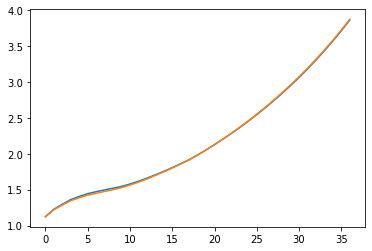

In [36]:
import matplotlib.pyplot as plt
plt.plot(game.ne_temp_planning_brd)
plt.plot(game.ne_temp_planning_gd)

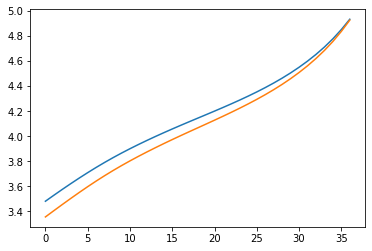

In [37]:
plt.plot(game.ne_a_planning_brd[1])
plt.plot(game.ne_a_planning_gd[1])


In [25]:
plt.plot(game.player[1])

AttributeError: 'Game' object has no attribute 'player'

In [1]:
import numpy as np

In [5]:

np.tile(np.arange(5),2)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

0.0
0.0


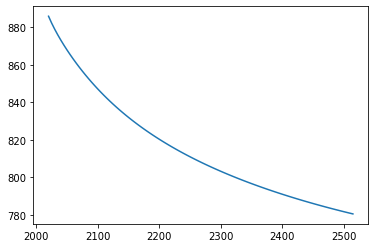

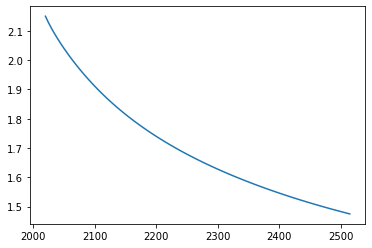

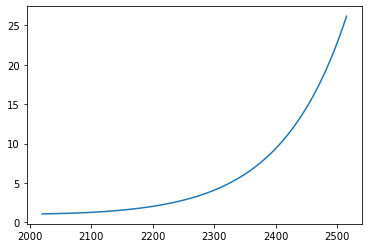

In [28]:
from models.geophysic_models import *
import numpy as np
import matplotlib.pyplot as plt

scm = Simple_Climate_Model(Carbon_FUND(), Temp_Discret_Geoffroy(), non_co2_radiative_forcing=np.zeros(5000), non_human_carbon_emission=np.zeros(5000) )

X = np.arange(100)* 5 + 2020

emission = np.ones(100)

c_at, forcing, temp_at = scm.evaluate_trajectory(emission)

plt.plot(X, c_at)
plt.show()

plt.plot(X, forcing)
plt.show()

plt.plot(X, temp_at)
plt.show()

In [6]:
from models.geophysic_models import *
from models.geophysic_models.constants import * 

temp = Temp_Discret_Geoffroy()

temp.bdt

1.0

In [7]:
temp.bt @ temp.dt * F_2XCO2 /np.log(2)


2.0128745333312024

In [32]:
temp.bt

array([1, 0])

In [20]:
from scipy.misc import derivative 
from parameters import *
damage = damage_polynome([0,0,1])
scm = Simple_Climate_Model(Carbon_JOOS(), Temp_Discret_Geoffroy())

In [38]:
def utility(action, temp):
    return BENEFITS_CONVEX[0](20,10)(action) - damage(temp=temp + scm.five_years_atmospheric_temp(action+30))

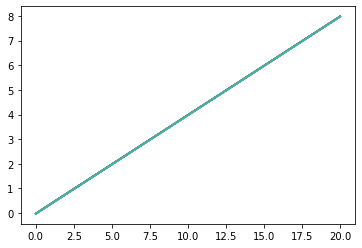

In [41]:
import matplotlib.pyplot as plt
x = np.linspace(0,20)
for temp in temp_at:
    plt.plot(x, [derivative(utility,x_, n=1,  order=5, args=[temp]) for x_ in x])

plt.show()


$\newcommand{\mat}[1]{\mathbf{#1}}$
$\newcommand{\trans}{^{\mathrm{T}}}$
$\newcommand{\emax}{e_{\max}}$
$\newcommand{\anmax}{a_{n,\max}}$
$\newcommand{\ammax}{a_{m,\max}}$
$\newcommand{\ajmax}{a_{j,\max}}$
$\newcommand{\unt}{u_{n,t}}$
$\newcommand{\tildunt}{\Tilde{u}_{n,t}}$
$\newcommand{\vecyt}{y_t} $
$\newcommand{\vecytt}{y_{t+1}}$
$\newcommand{\yt}{y_{1,t}}$
$\newcommand{\ytt}{y_{1,t+1}}$
$\newcommand{\Ansum}{A_{n,t}\left(\sum_{m=1,m\neq n}^Na_m\right)}$
$\newcommand{\ansumam}{\left(a_n,\sum_{m=1,m\neq n}^Na_m\right)}$
$\newcommand{\anT}{\Tilde{a}_n}$
$\newcommand{\Ant}{A_{n,t}(a_{-n})}$


$\newcommand{\Acal}{\mathcal{A}}$
$\newcommand{\Ancal}{\mathcal{A}_n}$
$\newcommand{\Amoinsncal}{\mathcal{A}_{-n}}$
$\newcommand{\Ncal}{\mathcal{N}}$
$\newcommand{\zAT}{z_{AT}} $
$\newcommand{\zUP}{z_{UP}} $
$\newcommand{\zLO}{z_{LO}} $
$\newcommand{\yAT}{y_{AT}} $
$\newcommand{\yLO}{y_{LO}} $
$\newcommand{\Variable}{\left(a(t);x_t\right)} $

$$\begin{align*}
    &\frac{\partial^2 u_n}{\partial a_n^2(t)}\Variable   \\
    & =\frac{\partial^2B_n}{\partial a_n^2(t)}(a_n(t)) -\delta_n\left[ D''\left(\yAT\Variable\right) \left( \yAT\Variable \right)^2 + D'\left(\yAT\Variable\right) \frac{\partial^2\yAT}{\partial a_n(t)\partial a_m(t)}\Variable  \right]\\
    & =\frac{\partial^2B_n}{\partial a_n^2(t)}(a_n(t)) -\delta_n\left[ 2\gamma_2 \left( \yAT\Variable \right)^2 + \left(2\gamma_2 \yAT\Variable + \gamma_1\right) \frac{\partial^2\yAT}{\partial a_n(t)\partial a_m(t)}\Variable  \right]\\
    & =\frac{\partial^2B_n}{\partial a_n^2(t)}(a_n(t)) -\delta_n\left[ 2\gamma_2 \left( \frac{F_{2\times CO_2}\,b_y\trans d_y b_z\trans d_z}{\ln{2}b_z \trans \left[A_z z(t) + d_z \sum_{n\in\Ncal} a_n(t)\right]} \right)^2 + \left(2\gamma_2 \yAT\Variable + \gamma_1\right) \frac{F_{2\times CO_2}\,b_y\trans d_y\left[b_z\trans d_z\right]^2}{\ln{2}\left[b_z \trans A_z z(t) + b_z \trans d_z \sum_{n\in\Ncal} a_n(t)\right]^2}  \right]\\
\end{align*}$$

$$\left[\frac{2\gamma_2F_{j\times CO_2}\,b_y\trans d_y}{\ln{j}}-\gamma_1-2\gamma_2\yAT\Variable\right]$$

In [32]:
d = [0,0,1]
def f(temp):
    return ( F_2XCO2 * 2 * d[2] * scm.temperature_model.bt @ scm.temperature_model.dt)/ np.log(2) - d[1] - 2 * d[2] * temp 

$$\frac{\delta_nF_{j\times CO_2}\,b_y\trans d_y\left[b_z\trans d_z\right]^2}{\ln{j}\left[b_z \trans A_zz(t)+b_z \trans d_z \displaystyle\sum_{n\in\Ncal} a_n(t)\right]^2}$$

In [33]:
def g(carbon):
    return DELTAS[0] * F_2XCO2 * scm.temperature_model.bt @ scm.temperature_model.dt * (scm.carbon_model.bc @ scm.carbon_model.dc)**2 /(np.log(2) * carbon **2)

In [39]:
def h():
    return-(GDP_MAX[0]) /ACTION_SETS[0,1]**2

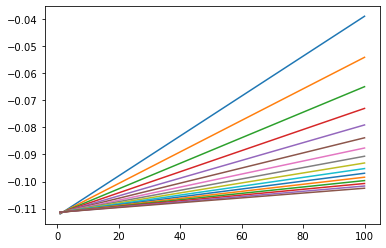

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from models.geophysic_models import *
from parameters import *
temp = np.linspace(1,100,50)
scm = Simple_Climate_Model(Carbon_JOOS(), Temp_Discret_Geoffroy())
for carbon in range(400,1200,50):
    plt.plot(temp, h()  - GDP_MAX[0]* g(carbon)* f(temp))

plt.show()

In [42]:
def h():
    return GDP_MAX[0]/ACTION_SETS[0,1]**2

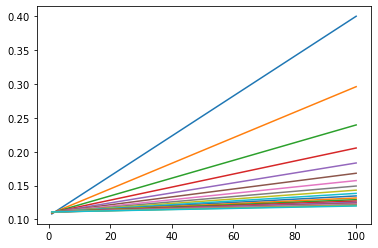

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from models.geophysic_models import *
from parameters import *
temp = np.linspace(1,100,50)
scm = Simple_Climate_Model(Carbon_JOOS(), Temp_Discret_Geoffroy())
for carbon in range(200,1200,50):
    plt.plot(temp, h()  - GDP_MAX[0]* g(carbon)* f(temp))

plt.show()

In [1]:
import numpy as np



In [2]:
x = np.arange(5)

In [3]:
x**2

array([ 0,  1,  4,  9, 16], dtype=int32)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from parameters import *

In [2]:
x = np.linspace(*ACTION_SETS[0])


In [3]:
x

array([ 0.        ,  0.23408163,  0.46816327,  0.7022449 ,  0.93632653,
        1.17040816,  1.4044898 ,  1.63857143,  1.87265306,  2.10673469,
        2.34081633,  2.57489796,  2.80897959,  3.04306122,  3.27714286,
        3.51122449,  3.74530612,  3.97938776,  4.21346939,  4.44755102,
        4.68163265,  4.91571429,  5.14979592,  5.38387755,  5.61795918,
        5.85204082,  6.08612245,  6.32020408,  6.55428571,  6.78836735,
        7.02244898,  7.25653061,  7.49061224,  7.72469388,  7.95877551,
        8.19285714,  8.42693878,  8.66102041,  8.89510204,  9.12918367,
        9.36326531,  9.59734694,  9.83142857, 10.0655102 , 10.29959184,
       10.53367347, 10.7677551 , 11.00183673, 11.23591837, 11.47      ])

In [16]:
idx = 4
percentage_green = PERCENTAGES_GREEN[idx]
x = ACTION_SETS[idx]+1e-10
y = np.array([GDP_MAX[idx] * percentage_green, GDP_MAX[idx]])
fit = np.polyfit(np.log(x), y,2)
p = np.poly1d(fit)

c:\ProgramData\Anaconda3\envs\CO2\lib\site-packages\IPython\core\interactiveshell.py:3433: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [12]:
def benefit_log(GDP_max, e_max, percentage_green = 0):
    x = np.array([1e-10, e_max])
    y = np.array([GDP_max * percentage_green, GDP_max])
    fit = np.poly1d(np.polyfit(np.log(x), y,1))
    def benef(x):
        return fit(np.log(x))
    return benef

In [13]:
benefit_quadratic_concave

<function models.game_theory_model.benefit_function.benefit_quadratic_concave(GDP_max: float, e_max: float, percentage_green: float = 0, **kwargs) -> <built-in function callable>>

In [18]:
print(fit)

p = np.poly1d(fit)

[-1.24053133e-03  3.23290260e-02  1.40212040e+00]


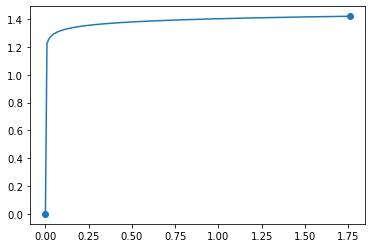

In [17]:
plt.scatter(x,y)
plt.plot(np.linspace(*ACTION_SETS[idx],200), p(np.log(np.linspace(*ACTION_SETS[idx]+1e-10,200))))

In [10]:
ACTION_SETS[idx]

array([ 0.  , 13.51])